In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
path='/content/drive/MyDrive/iris.csv'
df=pd.read_csv(path)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
print(df.columns)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [18]:
x=df.shape
print(x)

(150, 6)


In [19]:
df1=df.drop(columns=['Id','Species'])
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
col=df1.columns
lis1=[]
for i in col:
    X=df1[i].values
    lis=[]
    for j in col:
        Y=df1[j].values
        n = len(X)

    # Calculate means
        mean_X = sum(X) / n
        mean_Y = sum(Y) / n

        # Calculate deviations
        deviations_X = [x - mean_X for x in X]
        deviations_Y = [y - mean_Y for y in Y]

        # Calculate sum of products
        sum_of_products = sum([dev_X * dev_Y for dev_X, dev_Y in zip(deviations_X, deviations_Y)])

        # Calculate sum of squares
        sum_of_squares_X = sum([dev_X ** 2 for dev_X in deviations_X])
        sum_of_squares_Y = sum([dev_Y ** 2 for dev_Y in deviations_Y])

        corr = sum_of_products / (np.sqrt(sum_of_squares_X) * np.sqrt(sum_of_squares_Y))
        lis.append(corr)
    lis1.append(lis)
df_corr=pd.DataFrame(lis1)
df_corr

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


In [21]:
new_column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df_corr.columns=new_column_names
df_corr.index=new_column_names

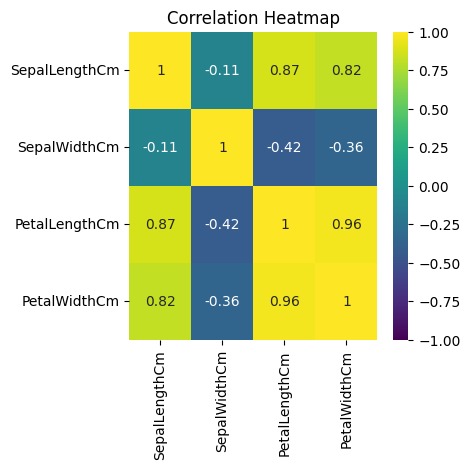

In [22]:
plt.figure(figsize=(4, 4))
sns.heatmap(df_corr, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
high_positive_corr = (df_corr > 0.7) & (df_corr < 1.0)
positive_corr_pairs = np.column_stack(np.where(high_positive_corr))
high_negative_corr = (df_corr < -0.7) & (df_corr > -1.0)
negative_corr_pairs = np.column_stack(np.where(high_negative_corr))

In [24]:
print("Highly Positively Correlated Attribute Pairs:")
for pair in positive_corr_pairs:
    attr1, attr2 = df_corr.index[pair[0]], df_corr.columns[pair[1]]
    corr_value = df_corr.iloc[pair[0], pair[1]]
    print(f"{attr1} and {attr2}: {corr_value:.2f}")

print("\nHighly Negatively Correlated Attribute Pairs:")
for pair in negative_corr_pairs:
    attr1, attr2 = df_corr.index[pair[0]], df_corr.columns[pair[1]]
    corr_value = df_corr.iloc[pair[0], pair[1]]
    print(f"{attr1} and {attr2}: {corr_value:.2f}")

Highly Positively Correlated Attribute Pairs:
SepalLengthCm and PetalLengthCm: 0.87
SepalLengthCm and PetalWidthCm: 0.82
PetalLengthCm and SepalLengthCm: 0.87
PetalLengthCm and PetalWidthCm: 0.96
PetalWidthCm and SepalLengthCm: 0.82
PetalWidthCm and PetalLengthCm: 0.96

Highly Negatively Correlated Attribute Pairs:


In [25]:

target_corr = df_corr

strong_positive_influence = target_corr[target_corr > 0.5]
strong_negative_influence = target_corr[target_corr < -0.5]

print("Attributes with Strong Positive Influence:")
for attr, corr_value in strong_positive_influence.items():
    print((attr, corr_value))

print("\nAttributes with Strong Negative Influence:")
for attr, corr_value in strong_negative_influence.items():
    print((attr, corr_value))


Attributes with Strong Positive Influence:
('SepalLengthCm', SepalLengthCm    1.000000
SepalWidthCm          NaN
PetalLengthCm    0.871754
PetalWidthCm     0.817954
Name: SepalLengthCm, dtype: float64)
('SepalWidthCm', SepalLengthCm    NaN
SepalWidthCm     1.0
PetalLengthCm    NaN
PetalWidthCm     NaN
Name: SepalWidthCm, dtype: float64)
('PetalLengthCm', SepalLengthCm    0.871754
SepalWidthCm          NaN
PetalLengthCm    1.000000
PetalWidthCm     0.962757
Name: PetalLengthCm, dtype: float64)
('PetalWidthCm', SepalLengthCm    0.817954
SepalWidthCm          NaN
PetalLengthCm    0.962757
PetalWidthCm     1.000000
Name: PetalWidthCm, dtype: float64)

Attributes with Strong Negative Influence:
('SepalLengthCm', SepalLengthCm   NaN
SepalWidthCm    NaN
PetalLengthCm   NaN
PetalWidthCm    NaN
Name: SepalLengthCm, dtype: float64)
('SepalWidthCm', SepalLengthCm   NaN
SepalWidthCm    NaN
PetalLengthCm   NaN
PetalWidthCm    NaN
Name: SepalWidthCm, dtype: float64)
('PetalLengthCm', SepalLengthCm  